<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

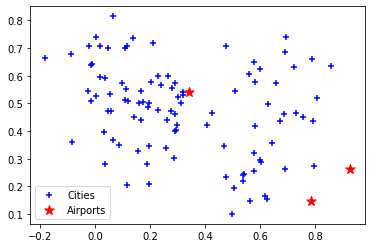

In [571]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [572]:
def initialize_list_of_airports(num_air):
  listOfAirports = []

  for val in range(num_air):
    listOfAirports.append([])
    
  return listOfAirports

# Calculate the straight line distance from each city to the airports and assign it to it nearest airport
def calculate_StraightLineDistance(setOfCities,listOfAirports,AirportNearestCities):
  cityNum = 0
  for eachCity in setOfCities:
    cityNum = cityNum + 1
    StraightDistancePerAirport = []
    
    for eachAirport in listOfAirports: #Give me the distance this city to all of my airports
      xDistance = (eachAirport[0] - eachCity[0]) ** 2
      yDistance = (eachAirport[1] - eachCity[1]) ** 2
      squaredDistance = xDistance + yDistance
      StraightDistancePerAirport.append(squaredDistance)
      
    airportNum = 0
    lowestDistance = math.inf
    for eachDistance in StraightDistancePerAirport:
      if(eachDistance < lowestDistance):
        lowestDistance = eachDistance
        airportNum = StraightDistancePerAirport.index(lowestDistance)
    
    AirportNearestCities[airportNum].append(eachCity)
    #print(lowestDistance,"#", cityNum,airportNum)

  #Return a set of nearby cities to that specific airport
  return AirportNearestCities

def calculate_ObjectiveFunction(AirportNearestCities,listOfAirports):
  ObjectiveFunction = 0.0

  #Sum of all of the airports
  for airportNum in range(len(listOfAirports)):
    airportX = listOfAirports[airportNum][0]
    airportY = listOfAirports[airportNum][1]
    #print("Airport #", airportNum + 1)
    #print("X",airportX,"Y",airportY)
    for cityNum in AirportNearestCities[airportNum]:
      CityX = cityNum[0]
      CityY = cityNum[1]
      #print("X",CityX,"Y",CityY)
      ObjectiveFunction = ObjectiveFunction + ((airportX - CityX) ** 2) + ((airportY - CityY) ** 2)

  return ObjectiveFunction

#Axis: 0 for X, 1 for Y
def sumOfAllDistanceinAxis(airport,ListOfNearbyCities,Axis):
  #print(airport[Axis])
  totalDistance = 0.0
  for eachCity in ListOfNearbyCities:
    totalDistance = totalDistance + (airport[Axis] - eachCity[Axis])
  
  totalDistance = totalDistance * 2
  return totalDistance
  
def Gradient(airports,alpha,CurrentAirportNearestCities):

  # Possible New Airport Coordinates for each airport
  for airportNum in range(len(airports)):

    #print("Airport Coord:",airports[airportNum])
    #print("Original Coord", airports[airportNum][0],airports[airportNum][1])

    totalXDistance = alpha * sumOfAllDistanceinAxis(airports[airportNum],CurrentAirportNearestCities[airportNum],0)
    totalYDistance = alpha * sumOfAllDistanceinAxis(airports[airportNum],CurrentAirportNearestCities[airportNum],1)

    #print("X Distance:", totalXDistance,"Y Distance: ", totalYDistance)

    airports[airportNum] = update_airport_position(airports[airportNum],totalXDistance,totalYDistance)
  
  return airports

def update_airport_position(airport,X,Y):
  #print("Old Airport Position",airport[0],airport[1])
  airport = (airport[0] - X, airport[1] - Y)
  #print("New Airport Position",airport[0],airport[1])
  return airport


In [573]:
import math

# Gradient Optimization take in the airport and the cities
def gradientOptimization(airports,cities,iteration,alpha):

  ObjectiveFunctionList = []

  # 0 < learningRate(alpha) << 0
  
  for eachIteration in range(iteration):

    #StraightDistPerAirport[Airport Num][City Num]
    StraightDistPerAirport = initialize_list_of_airports(len(airports))

    CurrentAirportNearestCities = initialize_list_of_airports(len(airports))

    #### Group  the cities with closet airport
    CurrentAirportNearestCities = calculate_StraightLineDistance(cities,airports,CurrentAirportNearestCities)

    #Get me the current Gradient Function
    CurrentObjectiveFunction = calculate_ObjectiveFunction(CurrentAirportNearestCities,airports)

    ObjectiveFunctionList.append(CurrentObjectiveFunction)

    # Gradient Section

    airports = Gradient(airports,alpha,CurrentAirportNearestCities)

    # Gradient Section

  return airports, ObjectiveFunctionList

ObjectiveFunctionList = []

numOfIteration = 15
alpha = .005

airports, ObjectiveFunctionList = gradientOptimization(airports,cities,numOfIteration,alpha)

#print(ObjectiveFunctionList)



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

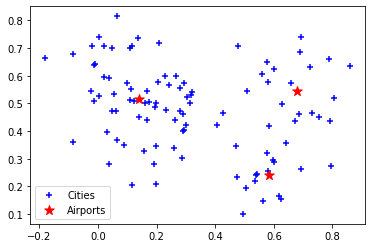

In [574]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

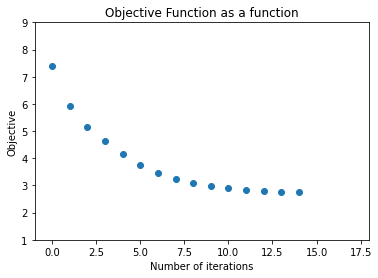

In [575]:
plt.xlim([-1,18])
plt.ylim([int(min(ObjectiveFunctionList))- 1,int(max(ObjectiveFunctionList)) + 2])
plt.plot(range(0,numOfIteration),ObjectiveFunctionList,'o')
plt.xticks([0,2.5,5.0,7.5,10.0,12.5,15.0,17.5])
plt.title("Objective Function as a function")
plt.xlabel("Number of iterations")
plt.ylabel("Objective")
#plt.yticks(range(15,35,2.5))
plt